# import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
from scipy.io import loadmat
import os
import import_ipynb
os.chdir(os.getcwd()+'\\Modules')
from time_shifted_PID import PIfunc
%matplotlib inline

importing Jupyter notebook from time_shifted_PID.ipynb


In [2]:
def nc(x):
    x = x.astype(float)
    return (x-np.mean(x))/np.std(x)

# Main

## input

In [2]:
dt = 0.01
Tot=300
T=np.arange(dt,Tot,dt)
OX = 'RN'
# OX = 'OU'

In [8]:
len(xSTA)

29999

In [48]:
if OX == 'RN':
    D = 27*10**5
    RN=np.zeros(len(T))
    mu, sigma = 0, 1
    RN=np.random.normal(mu,sigma,size = (len(T)))
    RN = (RN-np.mean(RN))/np.std(RN)
    x_list = [RN.copy()]
    Gsigma_list = np.arange(0,102,10)
    for i in np.arange(1,len(Gsigma_list)):
        x = ndimage.gaussian_filter1d(RN, sigma=Gsigma_list[i])
        x = x.astype(float)
        x_list.append(x.copy())
        
    D = 27*10**5
    RN=np.zeros(len(T))
    mu, sigma = 0, 1
    RN=np.random.normal(mu,sigma,size = (len(T)))
    RN = (RN-np.mean(RN))/np.std(RN)
    z_list = [RN.copy()]
    Gsigma_list = np.arange(0,102,10)
    for i in np.arange(1,len(Gsigma_list)):
        z = ndimage.gaussian_filter1d(RN, sigma=Gsigma_list[i])
        z = z.astype(float)
        z_list.append(z.copy())
elif OX == 'OU':
    # OU ; input
    tau= 1
    D = 27*10**5
    OU=np.zeros(len(T))
    mu, sigma = 0, 1
    for i in range(len(T)-1):
        OU[i+1]=OU[i]*(1-dt/tau)+math.sqrt(D*dt)*np.random.normal(mu,sigma)
    OU = (OU-np.mean(OU))/np.std(OU)

    # filtering for OUSmoothed
    x_list = []
    Fc_list = 2**np.arange(-1.,4.,1.)
    for Fc in Fc_list:
        b, a = signal.butter(2, 2*Fc*dt, btype='low', analog=False)
        x = signal.filtfilt(b, a, OU)
        x = x.astype(float)
        x_list.append(x.copy())
    Fc_list = np.append(Fc_list, 4*Fc_list[-1])
    x_list.append(OU)

In [49]:
v_list = []
for i in range(len(x_list)):
    x = x_list[i].copy()
    tv = ndimage.gaussian_filter1d(x.copy(), sigma=1, order=1, mode='reflect') / dt
    v = np.append(0,(np.diff(x)/dt))
    v_list.append(v.copy())

PT=0.0(s)


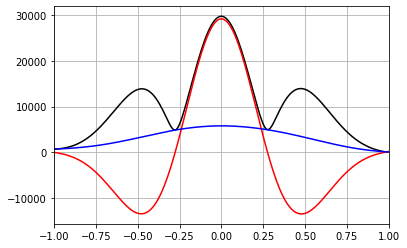

In [54]:
x1 = v_list[2]
x2 = z_list[3]
# x2 = x0

Lambda = 0.5
r = (1-Lambda)*x1+Lambda*x2

xSTA = np.correlate(nc(x1), nc(r), 'same')#/ np.correlate(np.ones_like(x1), rstate, 'same')
vSTA = np.correlate(nc(x2), nc(r), 'same')#/ np.correlate(np.ones_like(x2), rstate, 'same')
plt.plot(T-np.mean(T), np.sqrt(xSTA**2+vSTA**2), 'k')
plt.plot(T-np.mean(T), xSTA, 'r')
plt.plot(T-np.mean(T), vSTA, 'b')
# plt.gca().set_ylabel('STA')
plt.grid()
plt.xlim([-1,1])
print('PT='+str((T-np.mean(T))[np.argmax(xSTA**2+vSTA**2)])+'(s)')